In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("/kaggle/input/ann-car-sales-price-prediction/car_purchasing.csv",encoding='ISO-8859-1')

In [3]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [4]:
df.drop(columns = ["customer name","customer e-mail","country","gender"],axis = 1,inplace = True)

In [5]:
X = df.drop("car purchase amount",axis = 1)
Y = df["car purchase amount"]

In [6]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y.values.reshape(-1,1))

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [8]:
model = Sequential()

model.add(Dense(10,activation = 'relu',input_dim=4))
model.add(Dense(10,activation = 'relu'))
model.add(Dense(1,activation = 'linear'))

model.compile(optimizer = 'adam',loss = "mean_squared_error",metrics=["mean_absolute_error"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(x_train,y_train,epochs = 50 , validation_split = 0.2)

Epoch 1/50
10/10 [==============================] - 4s 23ms/step - loss: 0.0922 - mean_absolute_error: 0.2726 - val_loss: 0.0699 - val_mean_absolute_error: 0.2332
Epoch 2/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0575 - mean_absolute_error: 0.2049 - val_loss: 0.0423 - val_mean_absolute_error: 0.1719
Epoch 3/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0364 - mean_absolute_error: 0.1582 - val_loss: 0.0275 - val_mean_absolute_error: 0.1346
Epoch 4/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0250 - mean_absolute_error: 0.1293 - val_loss: 0.0207 - val_mean_absolute_error: 0.1135
Epoch 5/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0205 - mean_absolute_error: 0.1170 - val_loss: 0.0179 - val_mean_absolute_error: 0.1040
Epoch 6/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0183 - mean_absolute_error: 0.1101 - val_loss: 0.0164 - val_mean_absolute_error: 0.0992
Epoch 7/50
10/10 [=========

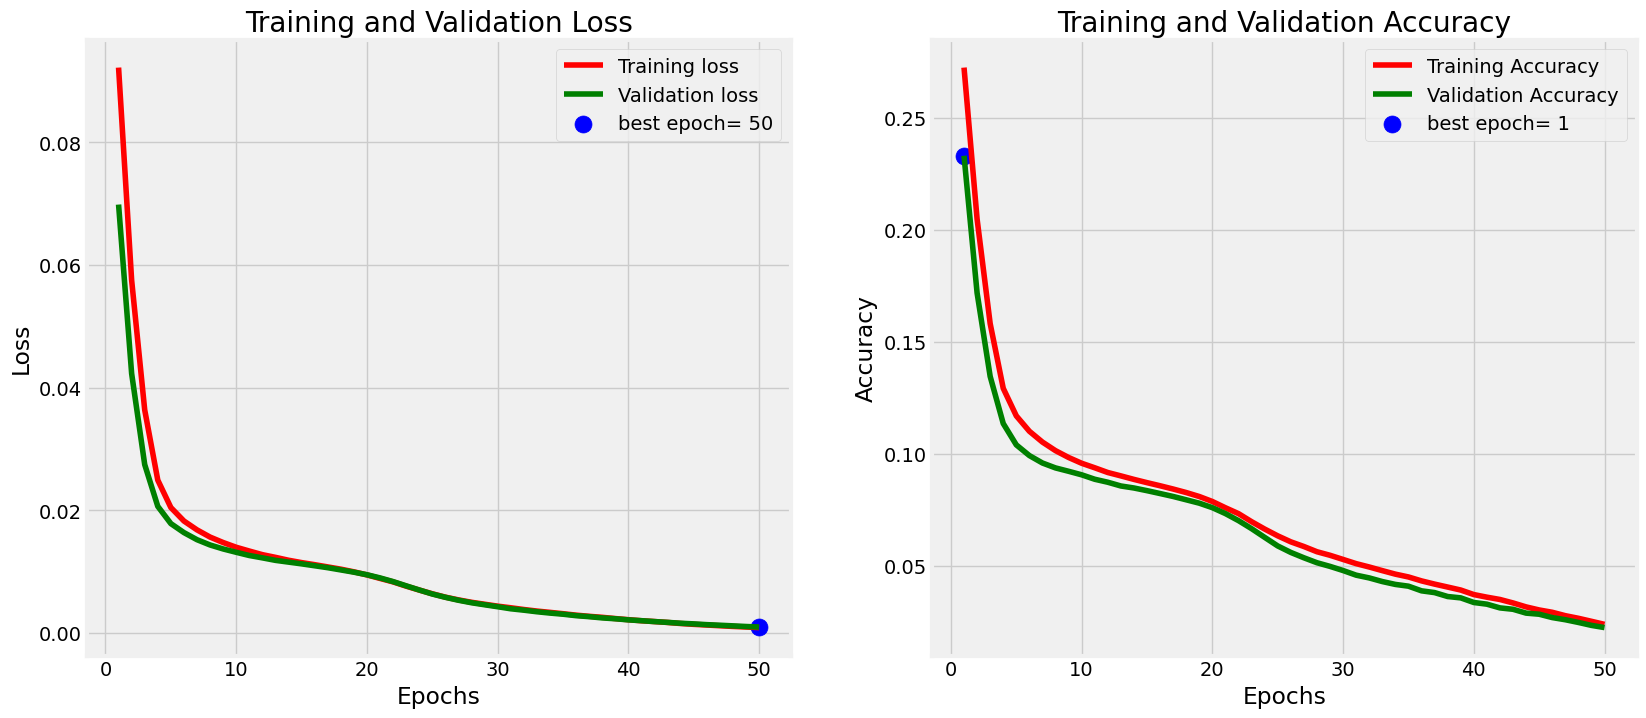

In [10]:
# Define needed variables
tr_acc = history.history['mean_absolute_error']
tr_loss = history.history['loss']
val_acc = history.history['val_mean_absolute_error']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [11]:
y_pred = model.predict(x_test)

4/4 [==============================] - 0s 2ms/step


In [12]:
from sklearn.metrics import r2_score

R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

R2 Score= 0.96206831633563
